# Data Ingestion

In [23]:
import numpy as np 
import pandas as pd 

df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [24]:
print(df.shape)
print(df.columns.tolist())

(7043, 21)
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [25]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [26]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Fill NaN with meaningful value

In [27]:
# Convert to numeric, set errors='coerce' to turn invalid values into NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Optionally, fill NaN with 0 or some other value
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Data Cleaning & Feature Engineering

In [28]:
from sklearn.preprocessing import LabelEncoder

# Separate categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols.remove('customerID')

# Initialize a LabelEncoder per column and save for inference
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le  # Save encoder

# Feature Engineering
df['loyalty_score'] = df['tenure'] / (df['TotalCharges'] + 1e-5)
df['lifetime_value'] = df['MonthlyCharges'] * df['tenure']

# Model Training & Validation

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, classification_report, confusion_matrix
from xgboost import XGBClassifier

# Encode target
target_le = LabelEncoder()
df['Churn'] = target_le.fit_transform(df['Churn'])

# Features & target
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

# Scale numeric columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 
            'loyalty_score', 'lifetime_value']

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

In [30]:
X.columns.tolist()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'loyalty_score',
 'lifetime_value']

In [31]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,loyalty_score,lifetime_value
5769,0,0,1,1,71,1,2,1,2,2,...,0,2,2,2,1,0,109.00,7661.80,0.009267,7739.00
1834,1,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,2,45.10,45.10,0.022173,45.10
3168,0,0,0,0,50,1,0,2,1,1,...,1,1,1,1,1,3,19.35,1033.00,0.048403,967.50
4205,0,0,1,1,24,1,2,0,2,0,...,0,2,2,2,0,1,78.60,1846.65,0.012997,1886.40
6218,0,0,1,1,70,0,1,0,0,2,...,2,2,2,1,1,0,58.40,4113.15,0.017019,4088.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,0,0,0,0,11,1,2,1,0,0,...,0,2,2,0,1,0,97.85,1105.40,0.009951,1076.35
4775,0,0,1,0,24,1,0,1,0,2,...,0,2,2,0,1,1,99.30,2431.35,0.009871,2383.20
358,1,1,1,0,27,0,1,0,2,0,...,0,0,0,0,0,1,30.75,805.10,0.033536,830.25
2710,0,0,1,0,24,1,0,2,1,1,...,1,1,1,1,0,1,20.40,482.80,0.049710,489.60


In [32]:
print(X_train.columns.tolist())

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'loyalty_score', 'lifetime_value']


In [33]:
X_train.shape

(6338, 21)

In [34]:
X_train.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
loyalty_score       float64
lifetime_value      float64
dtype: object

# Train XGBoost with hyperparameter tuning (Optuna)

In [35]:
import optuna

# Suppress verbose logs
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Objective function
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 5),
        'max_bin': trial.suggest_int('max_bin', 64, 512),
        'tree_method': trial.suggest_categorical('tree_method', ['auto', 'hist']),
        'use_label_encoder': False,
        'eval_metric': 'logloss',
        'random_state': 42
    }

    model = XGBClassifier(**params)
    model.fit(X_train_scaled, y_train)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    # Tune threshold after training (only once)
    best_f1 = 0
    for thresh in np.arange(0.3, 0.7, 0.01):
        y_pred_thresh = (y_prob >= thresh).astype(int)
        f1 = f1_score(y_test, y_pred_thresh)
        if f1 > best_f1:
            best_f1 = f1
    return best_f1

# Run Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

best_params = study.best_params
best_params.update({
    'use_label_encoder': False,
    'eval_metric': 'logloss',
    'random_state': 42
})

print("\nBest Params:", best_params)

# -------------------------
# Train final model
# -------------------------
final_model = XGBClassifier(**best_params)
final_model.fit(X_train_scaled, y_train)
y_prob = final_model.predict_proba(X_test_scaled)[:,1]

# Threshold tuning
best_f1 = 0
best_thresh = 0.5
for thresh in np.arange(0.3, 0.7, 0.01):
    y_pred_thresh = (y_prob >= thresh).astype(int)
    f1 = f1_score(y_test, y_pred_thresh)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = thresh

y_pred_final = (y_prob >= best_thresh).astype(int)


Best Params: {'n_estimators': 502, 'max_depth': 15, 'learning_rate': 0.1655328568778786, 'subsample': 0.9670982890831215, 'colsample_bytree': 0.5362093960008051, 'gamma': 4.243566111068429, 'min_child_weight': 3, 'max_delta_step': 9, 'reg_alpha': 4.640105876532774, 'reg_lambda': 3.2265399245837694, 'scale_pos_weight': 2.4306232797180303, 'max_bin': 65, 'tree_method': 'hist', 'use_label_encoder': False, 'eval_metric': 'logloss', 'random_state': 42}


# Evaluation

In [36]:
print("\nXGBoost Metrics after Optuna Hyperparameter Tuning")
print("Best Threshold:", best_thresh)
print("Accuracy:", accuracy_score(y_test, y_pred_final))
print("F1 Score:", f1_score(y_test, y_pred_final))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred_final))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_final))


XGBoost Metrics after Optuna Hyperparameter Tuning
Best Threshold: 0.47000000000000014
Accuracy: 0.7815602836879433
F1 Score: 0.6637554585152838
ROC-AUC: 0.8556356203415026

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.77      0.84       518
           1       0.56      0.81      0.66       187

    accuracy                           0.78       705
   macro avg       0.74      0.79      0.75       705
weighted avg       0.82      0.78      0.79       705

Confusion Matrix:
 [[399 119]
 [ 35 152]]


In [37]:
import joblib
import pandas as pd


# Input data (your JSON)
# Correct input JSON (use original categorical strings, not encoded integers)
input_data = {
    "gender": "Male",            # NOT 1
    "SeniorCitizen": 0,          # numeric is fine
    "Partner": "Yes",            # NOT 1
    "Dependents": "No",          # NOT 0
    "tenure": 12,
    "PhoneService": "Yes",
    "MultipleLines": "No",
    "InternetService": "DSL",
    "OnlineSecurity": "No",
    "OnlineBackup": "Yes",
    "DeviceProtection": "Yes",
    "TechSupport": "No",
    "StreamingTV": "Yes",
    "StreamingMovies": "Yes",
    "Contract": "Month-to-month",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Electronic check",
    "MonthlyCharges": 65.3,
    "TotalCharges": 785.6,
    "loyalty_score": 0.015,
    "lifetime_value": 1200.0
}


df_input = pd.DataFrame([input_data])

# Encode categorical features using saved encoders
for col in encoders:
    if col in df_input.columns:
        df_input[col] = encoders[col].transform(df_input[col])
    else:
        df_input[col] = 0  # Add missing columns

# Add missing columns from training
for col in X_train.columns:
    if col not in df_input.columns:
        df_input[col] = 0

# Reorder columns
df_input = df_input[X_train.columns]

# Scale numeric columns
df_input[num_cols] = scaler.transform(df_input[num_cols])

# Predict
churn_prob = final_model.predict_proba(df_input)[:, 1][0]
print("Churn Probability:", churn_prob)

Churn Probability: 0.42469448


# XAI - SHAP feature impact

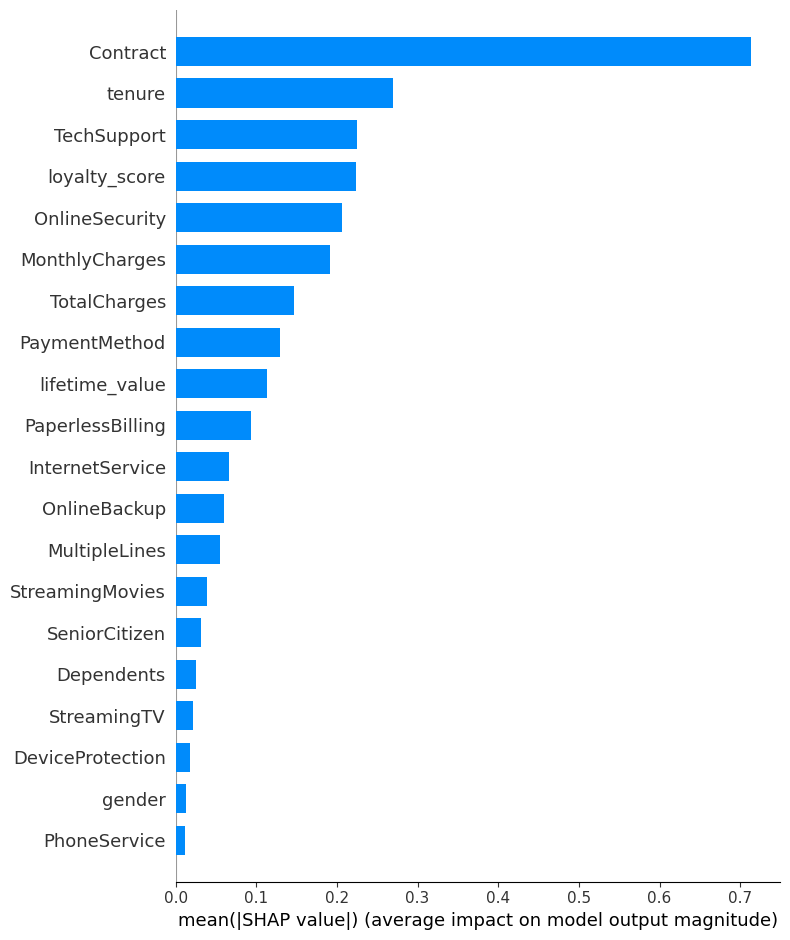

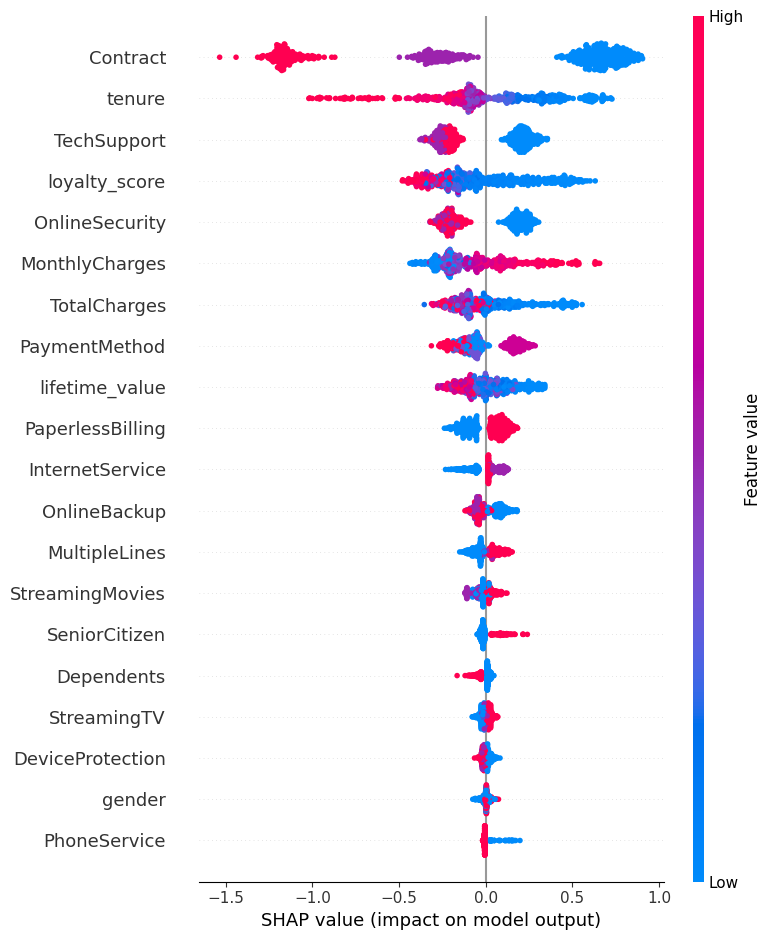

In [38]:
# -------------------------
# XAI - SHAP feature impact
# -------------------------
import shap
import matplotlib.pyplot as plt

# 1️⃣ SHAP Explainer
explainer = shap.Explainer(final_model, X_train_scaled)
shap_values = explainer(X_test_scaled)

# 2️⃣ Feature importance summary plot
plt.figure(figsize=(10,6))
shap.summary_plot(shap_values, X_test, plot_type="bar")  # বার চার্ট
plt.show()

# 3️⃣ SHAP summary dot plot (detailed)
plt.figure(figsize=(12,6))
shap.summary_plot(shap_values, X_test)  # প্রতিটি feature এর impact দেখাবে
plt.show()

In [45]:
import joblib

# Save final trained model
joblib.dump(final_model, "final_model.pkl")

# Save scaler used for numeric features
joblib.dump(scaler, "scaler.pkl")

# Save encoders dict for categorical columns
joblib.dump(encoders, "encoders.pkl")

# Save the column order of training features
X_train_columns = X_train.columns.tolist()
joblib.dump(X_train_columns, "X_train_columns.pkl")

print("All objects saved successfully!")


All objects saved successfully!


# Save Model, Scaler, and Encoders

In [39]:
import joblib
from sklearn.preprocessing import LabelEncoder

# Save scaler
joblib.dump(scaler, "scaler.pkl")

# Save trained model
joblib.dump(final_model, "xgb_churn_model.pkl")

# Save LabelEncoders for categorical columns
cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
            'PaperlessBilling', 'PaymentMethod']

encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le
    joblib.dump(le, f"{col}_le.pkl")

In [40]:

joblib.dump(X_train.columns.tolist(), "feature_columns.pkl")

['feature_columns.pkl']

In [41]:
import shutil
import os

# List all files/folders in /kaggle/working
for item in os.listdir('/kaggle/working'):
    item_path = os.path.join('/kaggle/working', item)
    if os.path.isfile(item_path) or os.path.islink(item_path):
        os.remove(item_path)  # remove file or symlink
    elif os.path.isdir(item_path):
        shutil.rmtree(item_path)  # remove directory and all contents

print("All files in /kaggle/working have been deleted.")

All files in /kaggle/working have been deleted.


In [42]:
import shutil

# Create a zip file containing everything in /kaggle/working
shutil.make_archive('/kaggle/working/all_files_backup', 'zip', '/kaggle/working')

print("All files have been zipped as all_files_backup.zip")

All files have been zipped as all_files_backup.zip


In [43]:
# -------------------------
# 4️⃣ Individual explanation (high-risk churn example with customerID)
# -------------------------

# Predict churn probabilities
y_prob = final_model.predict_proba(X_test_scaled)[:,1]

# Top 5 high-risk predictions
high_risk_idx = np.argsort(y_prob)[-5:]  # top 5 highest probability of churn

# Interactive force plot
for idx in high_risk_idx:
    original_index = X_test.index[idx]
    customer_id = df.loc[original_index, 'customerID']
    
    print(f"\nCustomer ID: {customer_id}")
    print(f"Predicted Churn Probability: {y_prob[idx]:.2f}")
    
    shap.initjs()  # required for JS visualization
    shap.force_plot(
        explainer.expected_value,
        shap_values[idx].values,
        X_test.iloc[idx,:]
    )


Customer ID: 6023-YEBUP
Predicted Churn Probability: 0.92



Customer ID: 9057-SIHCH
Predicted Churn Probability: 0.93



Customer ID: 9248-OJYKK
Predicted Churn Probability: 0.93



Customer ID: 0295-PPHDO
Predicted Churn Probability: 0.94



Customer ID: 5178-LMXOP
Predicted Churn Probability: 0.94


In [47]:
import pandas as pd
import numpy as np

n = 50

data = {
    "gender": np.random.choice(["Male","Female"], size=n),
    "SeniorCitizen": np.random.choice([0,1], size=n),
    "Partner": np.random.choice(["Yes","No"], size=n),
    "Dependents": np.random.choice(["Yes","No"], size=n),
    "tenure": np.random.randint(1, 72, size=n),  # longer tenure for variety
    "PhoneService": np.random.choice(["Yes","No"], size=n),
    "MultipleLines": np.random.choice(["Yes","No","No phone service"], size=n),
    "InternetService": np.random.choice(["DSL","Fiber optic","No"], size=n),
    "OnlineSecurity": np.random.choice(["Yes","No","No internet service"], size=n),
    "OnlineBackup": np.random.choice(["Yes","No","No internet service"], size=n),
    "DeviceProtection": np.random.choice(["Yes","No","No internet service"], size=n),
    "TechSupport": np.random.choice(["Yes","No","No internet service"], size=n),
    "StreamingTV": np.random.choice(["Yes","No","No internet service"], size=n),
    "StreamingMovies": np.random.choice(["Yes","No","No internet service"], size=n),
    "Contract": np.random.choice(["Month-to-month","One year","Two year"], size=n, p=[0.5,0.3,0.2]),
    "PaperlessBilling": np.random.choice(["Yes","No"], size=n),
    "PaymentMethod": np.random.choice(["Electronic check","Mailed check","Bank transfer (automatic)","Credit card (automatic)"], size=n),
    "MonthlyCharges": np.round(np.random.uniform(20, 120, size=n), 2)
}

# Introduce variability in TotalCharges
data["TotalCharges"] = np.round(
    data["MonthlyCharges"] * data["tenure"] * np.random.uniform(0.8,1.2,size=n),2
)

df = pd.DataFrame(data)
df.to_csv("sample_batch_customers_varied.csv", index=False)
print("sample_batch_customers_varied.csv created with mixed risk customers!")


sample_batch_customers_varied.csv created with mixed risk customers!
